# traer data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [64]:
!pwd

/home/lucaspancotto/code/JoacoSoulez/mental_health_first_aid_evaluation/MHFA/notebooks/neural networks


In [65]:
'''twitter = pd.read_csv('../../../data/tweets_cleaned.csv').drop(columns = ['Unnamed: 0'])
twitter.head()'''

"twitter = pd.read_csv('../../../data/tweets_cleaned.csv').drop(columns = ['Unnamed: 0'])\ntwitter.head()"

In [66]:
twitter_reddit = pd.read_csv('../../../data/twitter_reddit_text.csv')
twitter_reddit.drop(columns=['Unnamed: 0'], inplace = True)
twitter_reddit = twitter_reddit.loc[:len(twitter_reddit)-1000]
twitter_reddit['text'] = twitter_reddit.clean_text
twitter_reddit.drop(columns= ['clean_text'] , inplace = True)
twitter_reddit.head()


,label,text
0,1,lay bed hour point back pain get work minut cl...
1,0,dlitedaili dont play wouldnt want anyth world
2,0,rewebcoach hey handsom time get day go
3,0,get readi tenni maryyi
4,0,hear song band almost never play favourit radi...


In [67]:
transcriptions = pd.read_csv('../../../transcriptions/targets/transcriptions_targets_lemmatized.csv')
transcriptions['text'] = transcriptions.lemmatized_text
transcriptions['label'] = transcriptions.PHQ8_Binary
transcriptions = transcriptions.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0','clean_text',
       'lemmatized_text', 'PHQ8_Binary'])

In [68]:
transcriptions.head()

,text,label
0,fine angeles california family friend mixture ...,0.0
1,moscow family moved moved eventually college l...,0.0
2,connecticut actor moved san francisco moved at...,0.0
3,originally angeles weather family moved lot cu...,1.0
4,angeles lot thing love beach love love sunny t...,1.0


In [69]:
reddit_uncored = pd.read_csv('../../../uncored_data/reddit_uncored2.csv').loc[1000:]
transcriptions_uncored = pd.read_csv('../../../uncored_data/transcription_uncored.csv')

transcriptions_uncored['text'] = transcriptions_uncored.uncored
transcriptions_uncored['label'] = transcriptions_uncored.PHQ8_Binary
transcriptions_uncored.drop(columns=  ['Unnamed: 0' , 'uncored','Unnamed: 0.1','PHQ8_Binary'] , inplace=True)

In [70]:


reddit_uncored['text'] = reddit_uncored.uncored
reddit_uncored.drop(columns= ['uncored', 'Unnamed: 0'], inplace=True)

reddit_uncored.head()

,text,label
1000,i also think about going to the hospital 0 b...,1
1001,0 in the darkness with a 0 in 0 0 to m...,0
1002,0 gave me a 0 0 from uni for a while it ...,0
1003,if 0 is our 0 i do not want to be a part o...,1
1004,i have been 0 alone for about 0 now i 0 ...,1


In [71]:
transcriptions_uncored.head()

,text,label
0,i am 0 how about yourself i am from los 0 ...,0.0
1,um 0 um my 0 0 to the u s and then i 0 ...,0.0
2,yes okay 0 um to be an 0 well i 0 to 0 ...,0.0
3,yes i am okay 0 i am from here originally lo...,1.0
4,yes i am okay here in los 0 there is a 0 o...,1.0


In [72]:
transcriptions_reddit = transcriptions.merge(twitter_reddit , how='outer')

In [73]:
transcriptions_reddit['label']= transcriptions_reddit.label.astype(int)

In [74]:
transcriptions_reddit= transcriptions_reddit.sample(n=  6000, random_state = 42)

In [75]:
transcriptions_reddit.reset_index(drop=True, inplace=True)

In [76]:
transcriptions_reddit

,text,label
0,everyth tri feel better fail much shit continu...,1
1,mrdiamond umm gemini lol,0
2,memori suppress long suddenli trigger today re...,1
3,share tinyurl lkpoq si richard poon haha crino...,0
4,mcgradytraci rehab can not wait see play,0
...,...,...
5995,jashal ok gome back say said quot hi quot,0
5996,want close eye think tomorrow actual go tomorr...,1
5997,fight depress loneli crime doc thank golden st...,1
5998,nearli can not help feel like suppos best year...,1


In [77]:
transcriptions_reddit_val=transcriptions_reddit.loc[:999]

transcriptions_reddit_sample = transcriptions_reddit.loc[1000:]

In [78]:
transcriptions_reddit_val

,text,label
0,everyth tri feel better fail much shit continu...,1
1,mrdiamond umm gemini lol,0
2,memori suppress long suddenli trigger today re...,1
3,share tinyurl lkpoq si richard poon haha crino...,0
4,mcgradytraci rehab can not wait see play,0
...,...,...
995,got done play pa cousin wet field rain epic di...,0
996,fun first afternoon intern ridemakerz go great...,0
997,aaroul look brightsid least rain hail snow day...,0
998,run way process thing happen way cope depress ...,1


In [79]:
uncored = reddit_uncored.merge(transcriptions_uncored, how='outer')

In [80]:
uncored['label'] = uncored.label.astype(int)

In [81]:
uncored_sample = uncored.sample(n = 5000  , random_state = 42)

In [82]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /home/lucaspancotto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## train test split


In [83]:
#split for the data which is not uncored

X =transcriptions_reddit_sample.text
y = transcriptions_reddit_sample.label
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.3 )


In [84]:
#add uncored data to the training set
X_train = pd.concat([X_train,uncored_sample.text])
y_train = pd.concat([y_train , uncored_sample.label])

In [85]:
print('length of X_train',len(X_train), 'length of X_test',len(X_test), 'length of y_train',len(y_train), 'length of y_test',len(y_test))

length of X_train 8500 length of X_test 1500 length of y_train 8500 length of y_test 1500


In [86]:
#validation 

X_val = transcriptions_reddit_val.text
y_val = transcriptions_reddit_val.label

## word tokenize and word 2 vec

In [87]:


X_train = [word_tokenize(str(_)) for _ in X_train]
X_test = [word_tokenize(str(_)) for _ in X_test]
X_val = [word_tokenize(str(_)) for _ in X_val]


In [88]:


# This line trains an entire embedding for the words in your train set
word2vec = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=5)

In [89]:
import joblib
joblib.dump(word2vec,'word2vec_with_tweets3.sav' )

['word2vec_with_tweets3.sav']

# data embedding

## embed data

In [26]:
def embed_sentence(word2vec, sentence):
    # $CHALLENGIFY_BEGIN
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

In [27]:
def embedding(word2vec, sentences):
    # $CHALLENGIFY_BEGIN
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed
    # $CHALLENGIFY_END
    
X_train = embedding(word2vec, X_train)
X_test = embedding(word2vec, X_test)
X_val= embedding(word2vec, X_val)

## pad data

In [28]:
'''X_train_pad = pad_sequences(X_train, dtype='float', padding='post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post')'''

"X_train_pad = pad_sequences(X_train, dtype='float', padding='post')\nX_test_pad = pad_sequences(X_test, dtype='float', padding='post')"

In [29]:
print('number of train texts: ' ,len(X_train))
X_train[3].shape[0]

number of train texts:  8500


52

In [30]:
text_word_lengths = [X_train[i].shape[0] for i in np.arange(len(X_train))]
text_word_lengths_test = [X_test[i].shape[0] for i in np.arange(len(X_test))]

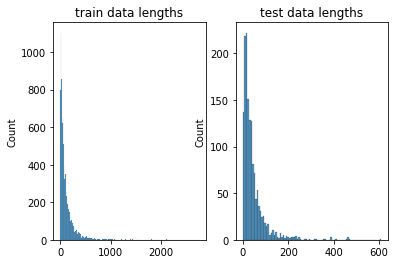

In [31]:
plt.figure()
plt.subplot(1,2,1)
plt.title('train data lengths')
sns.histplot(text_word_lengths)
plt.subplot(1,2,2)
plt.title('test data lengths')
sns.histplot(text_word_lengths_test)

In [32]:
#cortamos en 1000 words

X_train_pad = pad_sequences(X_train, dtype='float', padding='post', maxlen= 200,truncating= 'pre')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post', maxlen = 200 , truncating = 'pre')
X_val_pad = pad_sequences(X_val, dtype='float', padding='post', maxlen = 200 , truncating = 'pre')

# the model

## baseline score

In [33]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

y_pred = 0 if counts[0] > counts[1] else 1

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Number of labels in train set {0: 4253, 1: 4247}
Baseline accuracy:  0.5113333333333333


## first neural network

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(100, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(100, activation='tanh', return_sequences=True))
    model.add(layers.LSTM(50, activation='tanh'))

    model.add(layers.Dense(25, activation='tanh'))

    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(5, activation='tanh'))
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy', 'AUC','Precision','Recall'])
    
    return model

model = init_model()

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

history_fit = model.fit(X_train_pad, y_train.values, 
          batch_size = 32,
          epochs=100,
        validation_data= (X_val_pad,y_val.values) ,
          callbacks=[es],
          verbose = 1
         )

Epoch 1/100
266/266 [==============================] - 69s 186ms/step - loss: 0.6944 - accuracy: 0.5305 - auc: 0.5377 - precision: 0.5289 - recall: 0.5522 - val_loss: 0.6561 - val_accuracy: 0.6200 - val_auc: 0.6703 - val_precision: 0.6261 - val_recall: 0.5571
Epoch 2/100
266/266 [==============================] - 44s 165ms/step - loss: 0.6798 - accuracy: 0.5649 - auc: 0.5922 - precision: 0.5566 - recall: 0.6355 - val_loss: 0.6899 - val_accuracy: 0.5970 - val_auc: 0.7006 - val_precision: 0.6900 - val_recall: 0.3224
Epoch 3/100
266/266 [==============================] - 44s 165ms/step - loss: 0.6696 - accuracy: 0.5907 - auc: 0.6231 - precision: 0.5809 - recall: 0.6489 - val_loss: 0.6734 - val_accuracy: 0.5900 - val_auc: 0.7088 - val_precision: 0.6905 - val_recall: 0.2959
Epoch 4/100
266/266 [==============================] - 44s 164ms/step - loss: 0.6564 - accuracy: 0.6141 - auc: 0.6530 - precision: 0.6049 - recall: 0.6567 - val_loss: 0.6383 - val_accuracy: 0.6300 - val_auc: 0.7289 - val

In [49]:
import joblib
joblib.dump(model, 'rnn_without_tweets1.sav')

FileNotFoundError: ignored

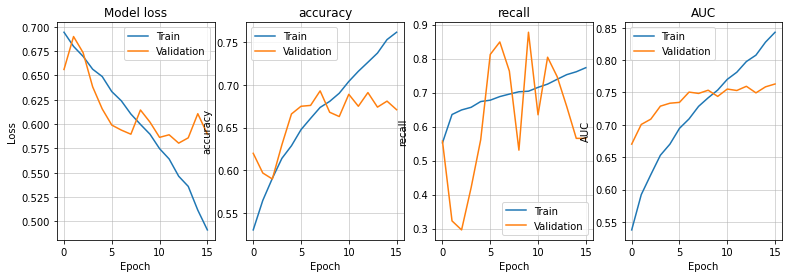

In [46]:
def plot_loss_mae(history):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    #ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('accuracy')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('Epoch')
    #ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    
    
    ax3.plot(history.history['recall'])
    ax3.plot(history.history['val_recall'])
    ax3.set_title('recall')
    ax3.set_ylabel('recall')
    ax3.set_xlabel('Epoch')
    #ax3.set_ylim(ymin=0, ymax=20)
    ax3.legend(['Train', 'Validation'], loc='best')
    ax3.grid(axis="x",linewidth=0.5)
    ax3.grid(axis="y",linewidth=0.5)
    
    ax4.plot(history.history['auc'])
    ax4.plot(history.history['val_auc'])
    ax4.set_title('AUC')
    ax4.set_ylabel('AUC')
    ax4.set_xlabel('Epoch')
    #ax4.set_ylim(ymin=0, ymax=20)
    ax4.legend(['Train', 'Validation'], loc='best')
    ax4.grid(axis="x",linewidth=0.5)
    ax4.grid(axis="y",linewidth=0.5)
    
    plt.show()

plot_loss_mae(history_fit)

In [47]:
evaluation = model.evaluate(X_test_pad , y_test.values , verbose = 1 , return_dict=True)

47/47 [==============================] - 2s 48ms/step - loss: 0.6118 - accuracy: 0.6673 - auc: 0.7318 - precision: 0.6367 - recall: 0.7435


In [48]:
evaluation

{'accuracy': 0.6673333048820496,
 'auc': 0.7318364977836609,
 'loss': 0.611809253692627,
 'precision': 0.6366822719573975,
 'recall': 0.7435197830200195}